# Get OpenCV samples
- Use `sudo apt install subversion` if `svn: command not found`

In [189]:
# !svn checkout https://github.com/opencv/opencv/trunk/samples/data > /dev/null 2>&1

# Import libraries

In [190]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Custom Functions

In [191]:
def rgb2gray(image):
    return np.rint(np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])).astype(int)

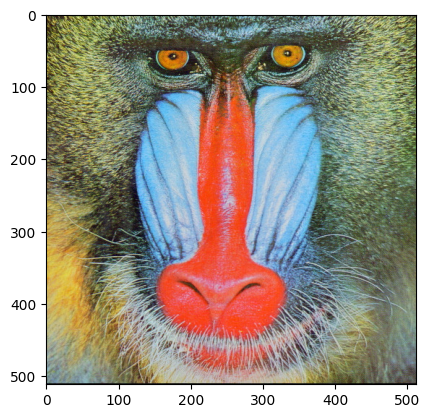

In [192]:
original = imread("./data/baboon.jpg")

original.shape
# original[0]
plt.imshow(original);

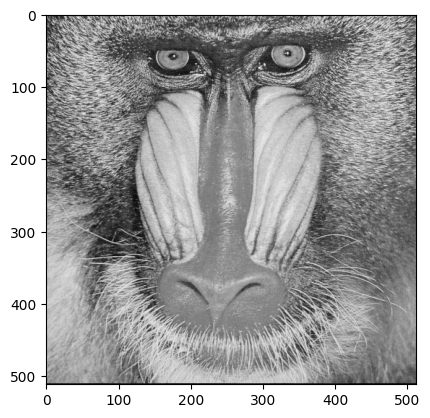

In [193]:
grayscale = rgb2gray(original)

grayscale.shape
# grayscale[0]
plt.imshow(grayscale,cmap='gray');

In [194]:
from scipy.ndimage import map_coordinates

def affine_transformation(transformation_matrix, image):
  x, y = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
  coords = np.stack([x, y, np.ones(x.shape).astype(int)], axis=-1)

  transformed_coords = np.matmul(coords.reshape(-1, 3), transformation_matrix.T)
  transformed_coords = transformed_coords[:, :2].reshape(image.shape[0], image.shape[1], 2) # Keep only (x, y) coordinates

  return map_coordinates(grayscale, (transformed_coords[..., 1], transformed_coords[..., 0]), order=1, mode='constant', cval=0.0)

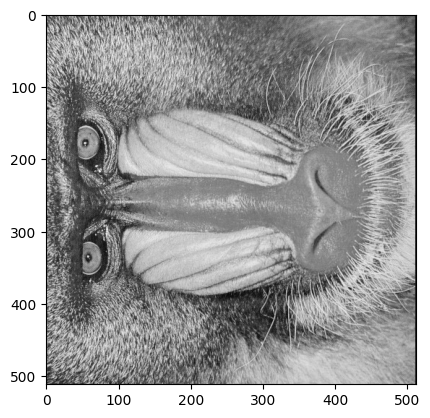

In [195]:
t1 = np.array([[1,0,-256],[0,1,-256],[0,0,1]])
t2 = np.array([[0,-1,0],[1,0,0],[0,0,1]])
t3 = np.array([[1,0,256],[0,1,256],[0,0,1]])

transformed_image = affine_transformation(t3@t2@t1,grayscale)
plt.imshow(transformed_image,cmap='gray');